In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # modelo de regresión lineal
from sklearn.model_selection import train_test_split # separar datos de entrenamiento y testeo
from sklearn.metrics import mean_squared_error,r2_score # evaluar modelos de regresión

In [4]:
df=pd.read_csv('conjunto de datos/ALERTA.csv', delimiter=';')
df

,UDI,Producto ID,Nombre_Producto,Tipo,Temperatura_Aire,Temperatura_Proceso,Velocidad_Rotacion,Torque,Desgaste_Herramientas,Objetivo,Tipo_de_falla
0,1,M14860,Producto 7004,Medio,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,Producto 1004,Bajo,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,Producto 1005,Bajo,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,Producto 1006,Bajo,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,Producto 1007,Bajo,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,Producto 9998,Medio,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,Producto 1002,Alto,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,Producto 9999,Medio,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,Producto 1003,Alto,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
# correlación
df_num = df.select_dtypes(include='number')
df_num.corr()


,UDI,Temperatura_Aire,Temperatura_Proceso,Velocidad_Rotacion,Torque,Desgaste_Herramientas,Objetivo
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Temperatura_Aire,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Temperatura_Proceso,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Velocidad_Rotacion,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Desgaste_Herramientas,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Objetivo,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


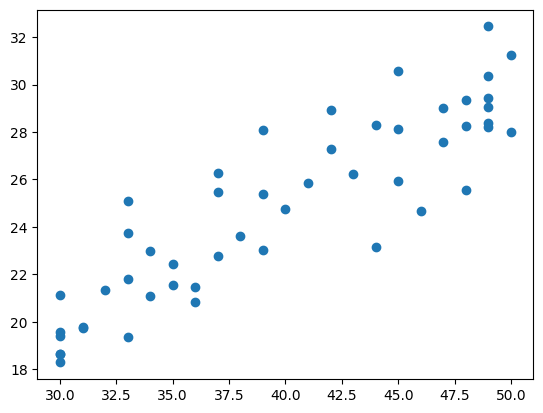

In [ ]:
# grafico de dispersión

plt.scatter(df['Horas Trabajadas'],df['Productos Terminados'])
plt.show()

In [ ]:
# seleccionar las variables
x=df['Horas Trabajadas'].values.reshape(-1,1)# debe quedar los datos en n filas y 1 columna
#x
y=df['Productos Terminados'].values # array con los valores de la columna
y

array([28.92548089, 30.57005826, 21.13288008, 21.79853018, 19.34344399,
       26.29094454, 28.07496809, 28.36096547, 29.35077307, 21.07498892,
       20.82839881, 27.27947199, 19.72827333, 21.44847529, 25.4914227 ,
       23.13359044, 28.99706125, 22.43750933, 26.22105208, 23.61868804,
       25.39727505, 28.01514046, 29.04812069, 24.69085847, 28.22055472,
       21.5411604 , 28.12272701, 25.94795907, 19.38527038, 28.26695212,
       23.73942392, 27.58415516, 30.3507868 , 29.44405763, 32.45197966,
       28.29356019, 22.77133138, 18.64244522, 19.79274429, 23.01850506,
       18.64995634, 24.73443149, 31.23960213, 25.08233692, 25.84200088,
       25.5486573 , 21.32131708, 18.28202936, 19.58715812, 22.97685293])

In [ ]:
# dividir los datos en datos de entrenamiento y datos de testeo
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
# aplicar el modelo

modelo=LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

In [ ]:
modelo.coef_

array([0.47577583])

In [ ]:
#modelo.coef_
print(round(modelo.coef_[0],3))# pendiente = a
print(round(modelo.intercept_,3))# intercepto = b
print(f'Ecuacion de la recta: y={round(modelo.coef_[0],3)}x + {round(modelo.intercept_,3)})')

0.476
6.126
Ecuacion de la recta: y=0.476x + 6.126)


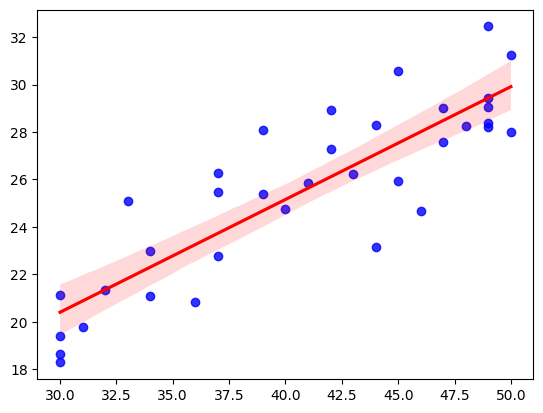

In [ ]:
# grafico con intervalo de confianza

sns.regplot(x=x_train,y=y_train,ci=95, line_kws={'color':'red'},scatter_kws={'color':'blue'})
plt.show()

In [ ]:
y_prediccion=modelo.predict(x_test) # predecir en base al modelo entrenado
y_prediccion
print(f"predicciones {y_prediccion}")
print(f"Valor real {y_test}")

predicciones [23.25398374 24.68131122 21.82665625 28.96329367 22.77820791 20.39932877
 27.53596619 22.77820791 29.4390695  24.20553539 20.8751046  21.82665625
 20.39932877 28.96329367 21.82665625]
Valor real [21.44847529 23.01850506 23.73942392 25.5486573  22.43750933 19.58715812
 28.12272701 21.5411604  30.3507868  23.61868804 19.72827333 19.34344399
 18.64244522 29.35077307 21.79853018]


In [ ]:
y_p=modelo.predict([[30],[350]]) #si trabajo 30 horas, mi producción es de 20 productos
y_p
                   
                   

array([ 20.39932877, 172.6475937 ])

In [ ]:
#evaluar el modelo

evalua1=modelo.score(x_test,y_test)
print(evalua1)

#error cuadratico medio
mse=mean_squared_error(y_test,y_prediccion)
print(f'MSE: {mse}')
r2=np.sqrt(mse)
print(f'R2: {r2}')


0.8094338229863243
MSE: 2.392548854445162
R2: 1.5467866221444901
